In [29]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
#from tensorflow.python.framework import ops


In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv(r"""C:\Users\aadit\Downloads\M1.csv""")

In [9]:
x = df.to_numpy()

In [10]:
k = 0
y = x[:,10]
x = x[:,0:10]

for i in range(x.shape[0]):
    x[i,0:3] = sorted(x[i,0:3])
    x[i,4:6] = sorted(x[i,4:6])
    x[i,7:10] = sorted(x[i,7:10])
    
print(x)
principal_x = pd.DataFrame(x)
principal_x.head()


[[ 0.78889  0.81111  0.81389 ...  0.15833  0.16389 70.244  ]
 [ 0.76944  0.79167  0.80833 ...  0.15833  0.16111 66.462  ]
 [ 0.82222  0.82222  0.86944 ...  0.175    0.17778 72.     ]
 ...
 [ 1.1833   1.2111   1.2389  ...  0.19167  0.75556 54.     ]
 [ 1.1694   1.2306   1.2528  ...  0.13611  0.14167 54.     ]
 [ 1.1222   1.1722   1.1833  ...  0.13611  0.70556 54.     ]]


,0,1,2,3,4,5,6,7,8,9
0,0.78889,0.81111,0.81389,0.088889,0.091667,0.094444,0.20556,0.15833,0.16389,70.244
1,0.76944,0.79167,0.80833,0.088889,0.086111,0.091667,0.16944,0.15833,0.16111,66.462
2,0.82222,0.82222,0.86944,0.086111,0.088889,0.088889,0.18333,0.17500,0.17778,72.000
3,0.80556,0.82778,0.84444,0.088889,0.086111,0.088889,0.17778,0.17222,0.17500,72.000
4,0.78333,0.80833,0.84167,0.091667,0.088889,0.091667,0.16111,0.15556,0.16944,72.000


In [11]:
principal_x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.78889,0.81111,0.81389,0.088889,0.091667,0.094444,0.20556,0.15833,0.16389,70.244
1,0.76944,0.79167,0.80833,0.088889,0.086111,0.091667,0.16944,0.15833,0.16111,66.462
2,0.82222,0.82222,0.86944,0.086111,0.088889,0.088889,0.18333,0.17500,0.17778,72.000
3,0.80556,0.82778,0.84444,0.088889,0.086111,0.088889,0.17778,0.17222,0.17500,72.000
4,0.78333,0.80833,0.84167,0.091667,0.088889,0.091667,0.16111,0.15556,0.16944,72.000


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=4)
X_train.shape

(132, 10)

In [30]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)
confusion_matrix(y_test, y_pred)
svm_accuracy = accuracy_score(y_test, y_pred)


C:\Users\aadit\.conda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aadit\.conda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aadit\.conda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n         0.0       0.46      0.94      0.62        18\n         1.0       0.00      0.00      0.00         7\n         2.0       0.38      0.38      0.38        16\n         3.0       0.00      0.00      0.00        10\n         4.0       0.70      0.70      0.70        10\n         5.0       1.00      0.60      0.75         5\n\n    accuracy                           0.50        66\n   macro avg       0.42      0.44      0.41        66\nweighted avg       0.40      0.50      0.42        66\n'

In [32]:
from sklearn.linear_model import LogisticRegression
pcar = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred =pcar.predict(X_test)
confusion_matrix(y_test, y_pred)
logistic_accuracy = accuracy_score(y_test, y_pred)
classification_report(y_test, y_pred)

C:\Users\aadit\.conda\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'              precision    recall  f1-score   support\n\n         0.0       0.72      1.00      0.84        18\n         1.0       1.00      1.00      1.00         7\n         2.0       0.73      0.69      0.71        16\n         3.0       0.83      0.50      0.62        10\n         4.0       0.89      0.80      0.84        10\n         5.0       1.00      0.80      0.89         5\n\n    accuracy                           0.80        66\n   macro avg       0.86      0.80      0.82        66\nweighted avg       0.82      0.80      0.80        66\n'

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
y_pred =clf.predict(X_test)
confusion_matrix(y_test, y_pred)
decisionTree_accuracy = accuracy_score(y_test, y_pred)
decisionTree_accuracy

0.9545454545454546

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train,y_train)
y_pred =clf.predict(X_test)
confusion_matrix(y_test, y_pred)
RF_accuracy = accuracy_score(y_test, y_pred)
RF_accuracy

0.6818181818181818

In [17]:
from sklearn.naive_bayes import GaussianNB
y_pred = GaussianNB().fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, y_pred)
NB_accuracy = accuracy_score(y_test, y_pred)
NB_accuracy

0.9393939393939394

In [18]:
epochs = 3000
batch_size = 10
# convert x_test to tensor to pass through model (train data will be converted to
# tensors on the fly)
x_test = tf.Variable(X_test)

In [19]:
def get_batch(x_data, y_data, batch_size):
    idxs = np.random.randint(0, len(y_data), batch_size)
    return x_data[idxs,:], y_data[idxs]

In [20]:
W1 = tf.Variable(tf.random.normal([10, 300]), name='W1')
b1 = tf.Variable(tf.random.normal([300]), name='b1')
# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.random.normal([300, 100]), name='W2')
b2 = tf.Variable(tf.random.normal([100]), name='b2')
W3 = tf.Variable(tf.random.normal([100,50]), name='W3')
b3 = tf.Variable(tf.random.normal([50]), name='b3')
W4 = tf.Variable(tf.random.normal([50,6]), name='W4')
b4 = tf.Variable(tf.random.normal([6]), name='b4')

In [21]:
def nn_model(x_input, W1, b1, W2, b2):
    x_input = tf.reshape(x_input, (x_input.shape[0], -1))
    x = tf.add(tf.matmul(tf.cast(x_input, tf.float32), W1), b1)
    x = tf.nn.tanh(x)
    x = tf.add(tf.matmul(tf.cast(x, tf.float32), W2), b2)
    x = tf.nn.relu(x)
    x = tf.add(tf.matmul(tf.cast(x, tf.float32), W3), b3)
    x = tf.nn.relu(x)
    logits = tf.add(tf.matmul(x, W4), b4)
    return logits

In [22]:
def loss_fn(logits, labels):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels,
                                                                              logits=logits))
    return cross_entropy

In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

In [24]:
total_batch = int(len(y_train) / batch_size)
max_acc = 0
for epoch in range(epochs):
    avg_loss = 0
    for i in range(total_batch):
        batch_x, batch_y = get_batch(X_train, y_train, batch_size=batch_size)
        # create tensors
        batch_x = tf.Variable(batch_x)
        #batch_y = tf.Variable(batch_y)
        # create a one hot vector
        batch_y = tf.one_hot(batch_y, 6)
        with tf.GradientTape() as tape:
            logits = nn_model(batch_x, W1, b1, W2, b2)
            loss = loss_fn(logits, batch_y)
        gradients = tape.gradient(loss, [W1, b1, W2, b2])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
        #optimizer.minimize(loss)
        avg_loss += loss / total_batch
        #optimizer.minimize(avg_loss)
    #test_logits = nn_model(X_test, W1, b1, W2, b2)
    test_logits = nn_model(X_test, W1, b1, W2, b2)

    max_idxs = tf.argmax(test_logits, axis=1)
    #test_acc = np.sum(max_idxs.numpy() == y_test) / len(y_test)

    test_acc = np.sum(max_idxs.numpy() == y_test) / len(y_test)
    max_acc = max(max_acc,test_acc)
    if(epoch%100==0):
        print(f"Epoch: {epoch + 1}, loss={avg_loss:.3f}, test set      accuracy={test_acc*100:.3f}%")

print(f"Epoch: {epoch + 1}, loss={avg_loss:.3f}, test set      accuracy={test_acc*100:.3f}%")
print("\nTraining complete!")
print(max_idxs.numpy())
print(y_test)

NN_accuracy = max_acc

Epoch: 1, loss=212.465, test set      accuracy=21.212%
Epoch: 101, loss=5.670, test set      accuracy=78.788%
Epoch: 201, loss=8.585, test set      accuracy=84.848%
Epoch: 301, loss=1.772, test set      accuracy=87.879%
Epoch: 401, loss=3.574, test set      accuracy=72.727%
Epoch: 501, loss=2.208, test set      accuracy=75.758%
Epoch: 601, loss=1.771, test set      accuracy=83.333%
Epoch: 701, loss=9.404, test set      accuracy=92.424%
Epoch: 801, loss=1.615, test set      accuracy=92.424%
Epoch: 901, loss=1.196, test set      accuracy=93.939%
Epoch: 1001, loss=6.239, test set      accuracy=93.939%
Epoch: 1101, loss=6.337, test set      accuracy=89.394%
Epoch: 1201, loss=8.076, test set      accuracy=89.394%
Epoch: 1301, loss=3.012, test set      accuracy=92.424%
Epoch: 1401, loss=3.336, test set      accuracy=90.909%
Epoch: 1501, loss=2.593, test set      accuracy=93.939%
Epoch: 1601, loss=3.479, test set      accuracy=86.364%
Epoch: 1701, loss=2.133, test set      accuracy=92.424%
Ep

In [88]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [45]:
table = [['SVM',svm_accuracy],['Random Forrest',RF_accuracy],['Logistic Regression',logistic_accuracy],['Naive Bayes',NB_accuracy],['Decision Tree',decisionTree_accuracy],['Neural Network',NN_accuracy]]
print(tabulate(table,headers=['Algorithm', 'Accuracy'], tablefmt='orgtbl'))

| Algorithm           |   Accuracy |
|---------------------+------------|
| SVM                 |   0.5      |
| Random Forrest      |   0.681818 |
| Logistic Regression |   0.80303  |
| Naive Bayes         |   0.939394 |
| Decision Tree       |   0.954545 |
| Neural Network      |   0.984848 |


<BarContainer object of 6 artists>

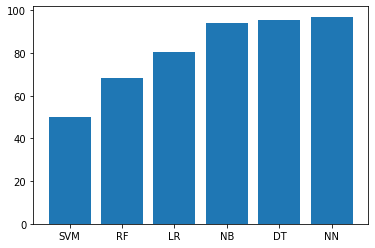

In [27]:
x = np.array(["SVM", "RF", "LR", "NB","DT","NN"])
y = np.array([svm_accuracy,RF_accuracy,logistic_accuracy, NB_accuracy, decisionTree_accuracy, NN_accuracy])*100

plt.bar(x,y)